In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('dati.xlsx',
                    index_col='Calendario',
                    parse_dates=True
                    )
data

,Categoria,Quantita
Calendario,,
2022-01-02,Burger,50.00
2022-01-10,Burger,1.00
2022-01-11,Burger,27.00
2022-01-12,Burger,48.00
2022-01-13,Burger,26.00
...,...,...
2023-02-08,Cocktail,17.00
2023-02-09,Cocktail,30.00
2023-02-10,Cocktail,83.99


In [4]:
data.Categoria.value_counts()

Burger      393
Fritti      393
Spine       383
Bar         382
Cocktail    382
Name: Categoria, dtype: int64

In [5]:
data[data['Categoria']=='Spine']

,Categoria,Quantita
Calendario,,
2022-01-02,Spine,111.00
2022-01-10,Spine,5.00
2022-01-11,Spine,55.00
2022-01-12,Spine,91.00
2022-01-13,Spine,93.00
...,...,...
2023-02-08,Spine,108.03
2023-02-09,Spine,135.00
2023-02-10,Spine,322.92


In [6]:
data.isnull().sum()

Categoria    0
Quantita     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1933 entries, 2022-01-02 to 2023-02-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  1933 non-null   object 
 1   Quantita   1933 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.3+ KB


In [8]:
data.index

DatetimeIndex(['2022-01-02', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18',
               ...
               '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
               '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
               '2023-02-11', '2023-02-12'],
              dtype='datetime64[ns]', name='Calendario', length=1933, freq=None)

In [9]:
data['Categoria'].value_counts()

Burger      393
Fritti      393
Spine       383
Bar         382
Cocktail    382
Name: Categoria, dtype: int64

In [9]:
index = data.index

df_spine = data[data['Categoria']=='Spine']
df_cocktail = data[data['Categoria']=='Cocktail']
df_burger = data[data['Categoria']=='Burger']
df_fritti = data[data['Categoria']=='Fritti']
df_bar = data[data['Categoria']=='Bar']

In [10]:
df_spine.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantita,383.0,172.455431,77.134227,5.0,122.25,161.0,212.8,566.99


In [11]:
df_spine.sort_values(by='Quantita', ascending=True)

,Categoria,Quantita
Calendario,,
2022-01-10,Spine,5.00
2022-01-24,Spine,33.00
2022-12-12,Spine,34.02
2023-01-30,Spine,45.00
2022-02-21,Spine,47.00
...,...,...
2022-07-20,Spine,403.99
2022-06-22,Spine,441.00
2022-07-06,Spine,463.00


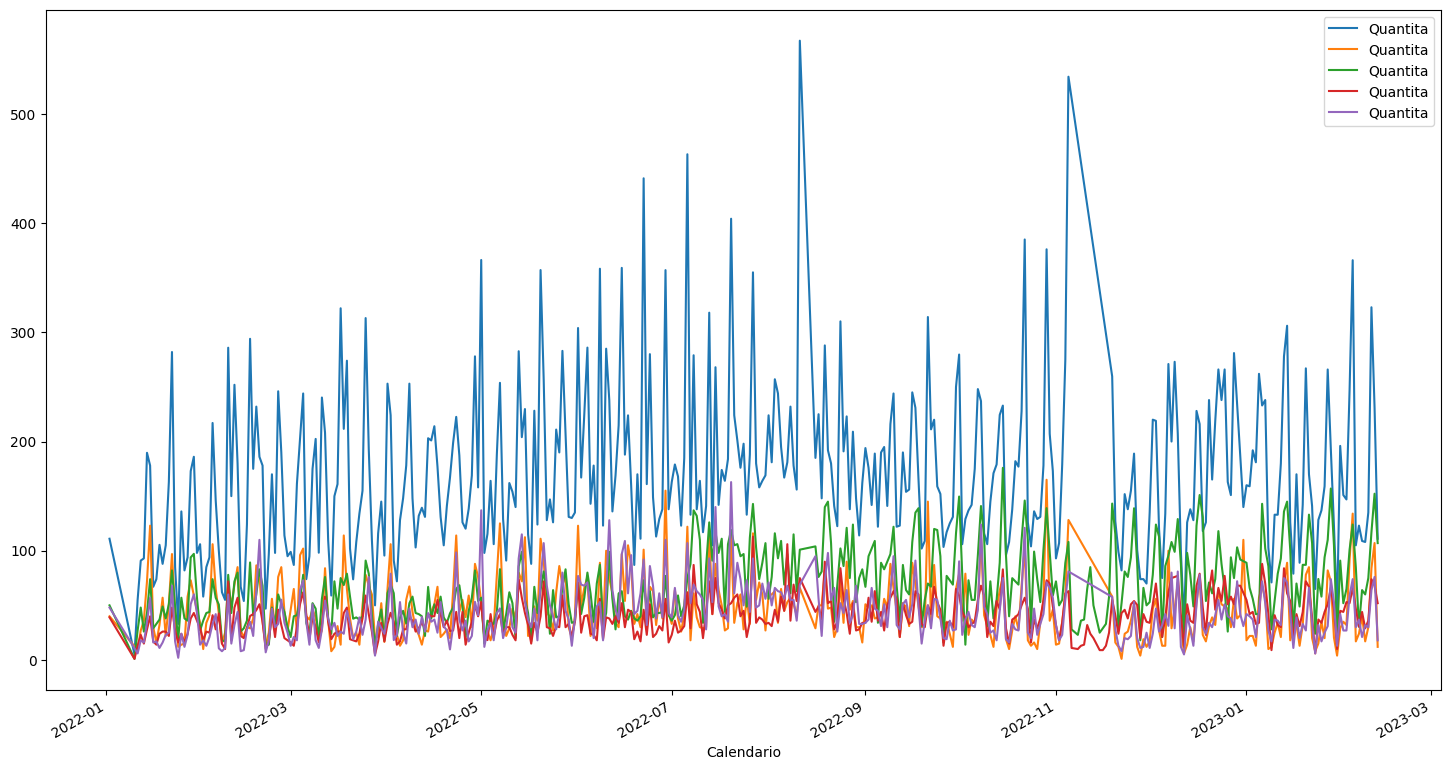

In [12]:
## Matplotlib Way
ax = plt.gca()
df_spine.plot(figsize=(18,10),ax=ax);
df_cocktail.plot(figsize=(18,10),ax=ax);
df_burger.plot(figsize=(18,10),ax=ax);
df_fritti.plot(figsize=(18,10),ax=ax);
df_bar.plot(figsize=(18,10),ax=ax);

In [13]:
df_spine

,Categoria,Quantita
Calendario,,
2022-01-02,Spine,111.00
2022-01-10,Spine,5.00
2022-01-11,Spine,55.00
2022-01-12,Spine,91.00
2022-01-13,Spine,93.00
...,...,...
2023-02-08,Spine,108.03
2023-02-09,Spine,135.00
2023-02-10,Spine,322.92


In [9]:
### ZOOM Plotly

import plotly.graph_objects as go

fig = go.Figure()

#Spine 
fig.add_trace(go.Scatter(x = df_spine.index, 
                         y = df_spine['Quantita'],
                         mode = "lines",
                         name = "Spine",
                         line_color='#0000FF',
                         ))
##############################################################
# #Cocktail 
fig.add_trace(go.Scatter(x = df_cocktail.index, 
                         y = df_cocktail['Quantita'],
                         mode = "lines", 
                         name = "Cocktail",
                         line_color='#ff8c00',
                         ))
##############################################################
#Burger 
fig.add_trace(go.Scatter(x = df_burger.index, 
                         y = df_burger['Quantita'],
                         mode = "lines", 
                         name = "Burger",
                         line_color='#FF00FF',
                         ))
##############################################################
#Fritti 
fig.add_trace(go.Scatter(x = df_fritti.index, 
                         y = df_fritti['Quantita'],
                         mode = "lines", 
                         name = "Fritti",
                         line_color='#00FF00',
                         ))
##############################################################
#Bar 
fig.add_trace(go.Scatter(x = df_bar.index, 
                         y = df_bar['Quantita'],
                         mode = "lines", 
                         name = "Bar",
                         line_color='#FF0000',
                         ))
##############################################################
# adjust layout
fig.update_layout(title = "Vendite",
                  xaxis_title = "Data",
                  yaxis_title = "Quantità",
                  width = 1200,
                  height = 700,
                  )
####################################################################
# zoomming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=15, label="15m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Featurizing

In [15]:
def create_features(df):
    """
    Create time series features based on Datetime index dataframe.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df_EDA = create_features(data)
df_EDA

,Categoria,Quantita,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Calendario,,,,,,,,,,
2022-01-02,Burger,50.00,0,6,1,1,2022,2,2,52
2022-01-10,Burger,1.00,0,0,1,1,2022,10,10,2
2022-01-11,Burger,27.00,0,1,1,1,2022,11,11,2
2022-01-12,Burger,48.00,0,2,1,1,2022,12,12,2
2022-01-13,Burger,26.00,0,3,1,1,2022,13,13,2
...,...,...,...,...,...,...,...,...,...,...
2023-02-08,Cocktail,17.00,0,2,1,2,2023,39,8,6
2023-02-09,Cocktail,30.00,0,3,1,2,2023,40,9,6
2023-02-10,Cocktail,83.99,0,4,1,2,2023,41,10,6


In [16]:
df_EDAspine = df_EDA[df_EDA['Categoria']=='Spine']
df_EDAcocktail = df_EDA[df_EDA['Categoria']=='Cocktail']
df_EDAburger = df_EDA[df_EDA['Categoria']=='Burger']
df_EDAfritti = df_EDA[df_EDA['Categoria']=='Fritti']
df_EDAbar = df_EDA[df_EDA['Categoria']=='Bar']

### Spine

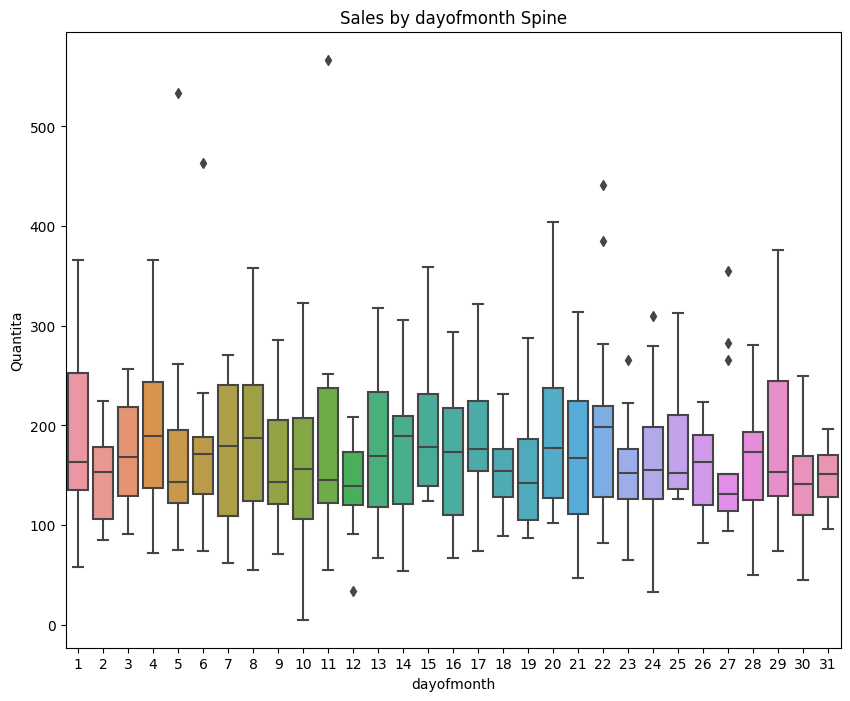

In [18]:
import seaborn as sns
cat = 'Spine'
data = df_EDAspine
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofmonth', y='Quantita')
ax.set_title(f'Sales by dayofmonth {cat}')
plt.show()

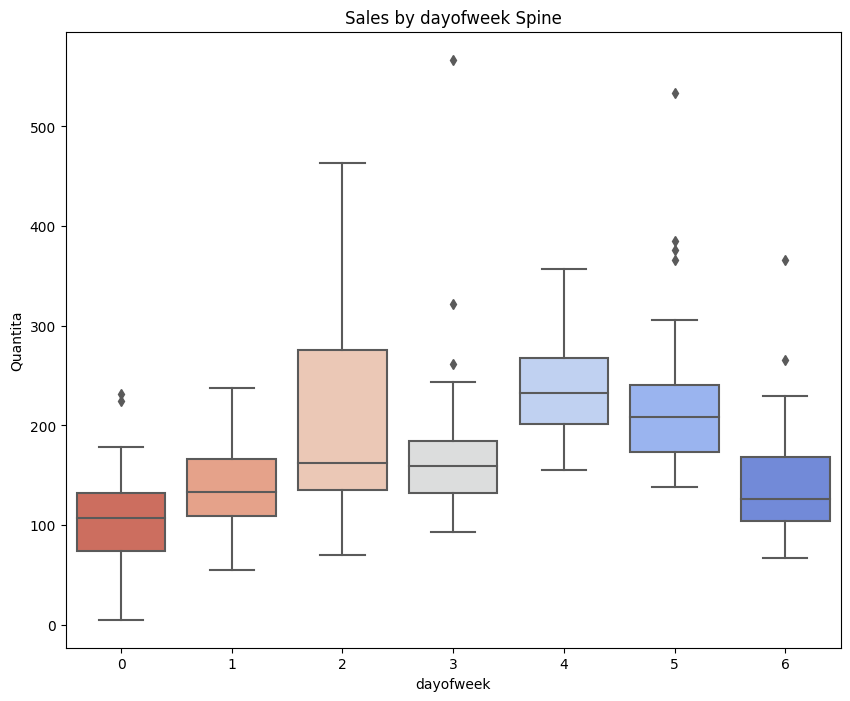

In [19]:
cat = 'Spine'
data = df_EDAspine

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofweek', y='Quantita', palette='coolwarm_r')
ax.set_title(f'Sales by dayofweek {cat}')
plt.show()

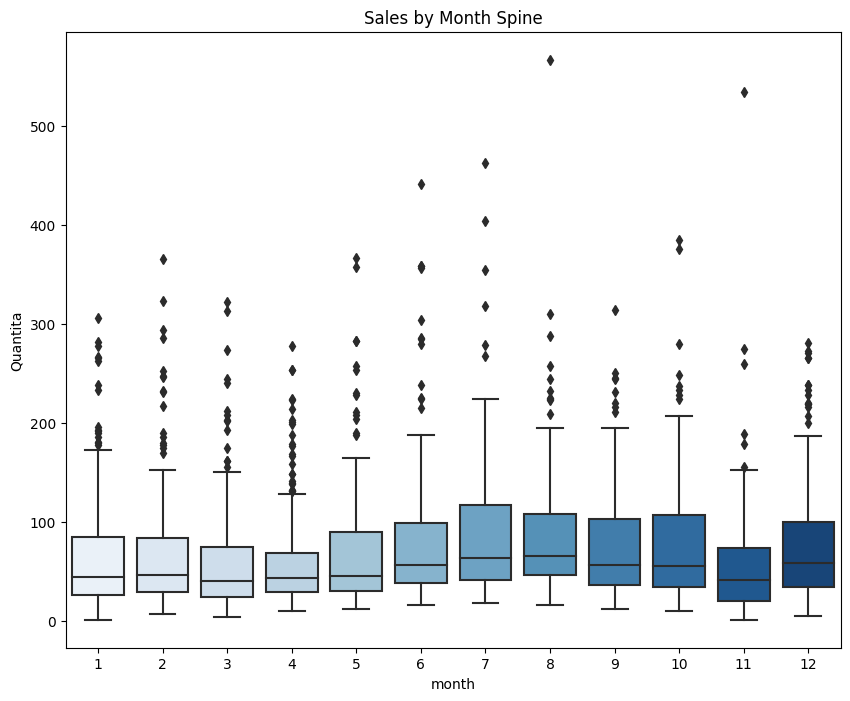

In [20]:
cat = 'Spine'
data = df_EDAspine
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y='Quantita', palette='Blues')
ax.set_title(f'Sales by Month {cat}')
plt.show()

### Burger

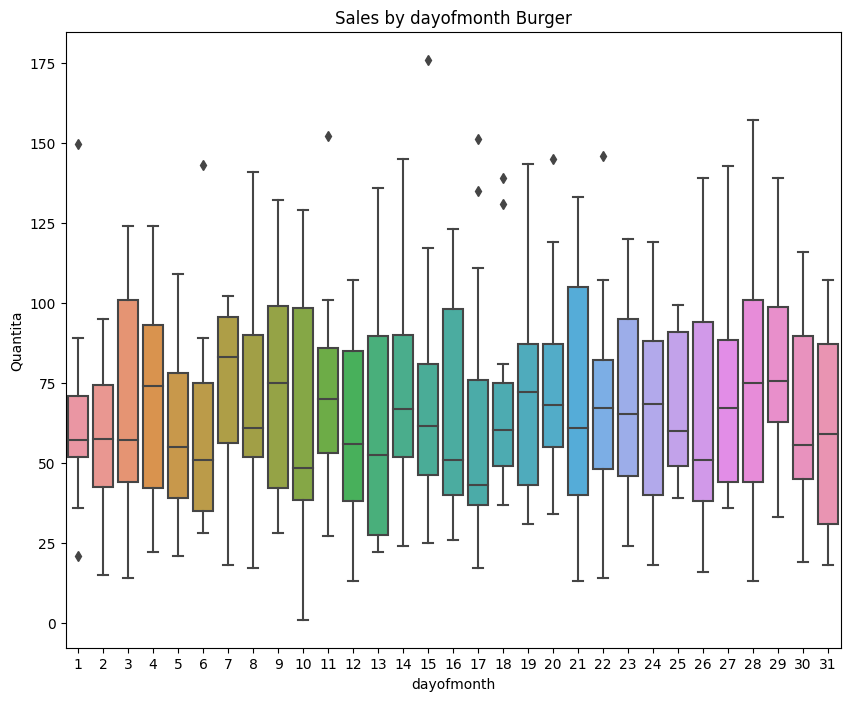

In [21]:
import seaborn as sns
cat = 'Burger'
data = df_EDAburger

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofmonth', y='Quantita')
ax.set_title(f'Sales by dayofmonth {cat}')
plt.show()

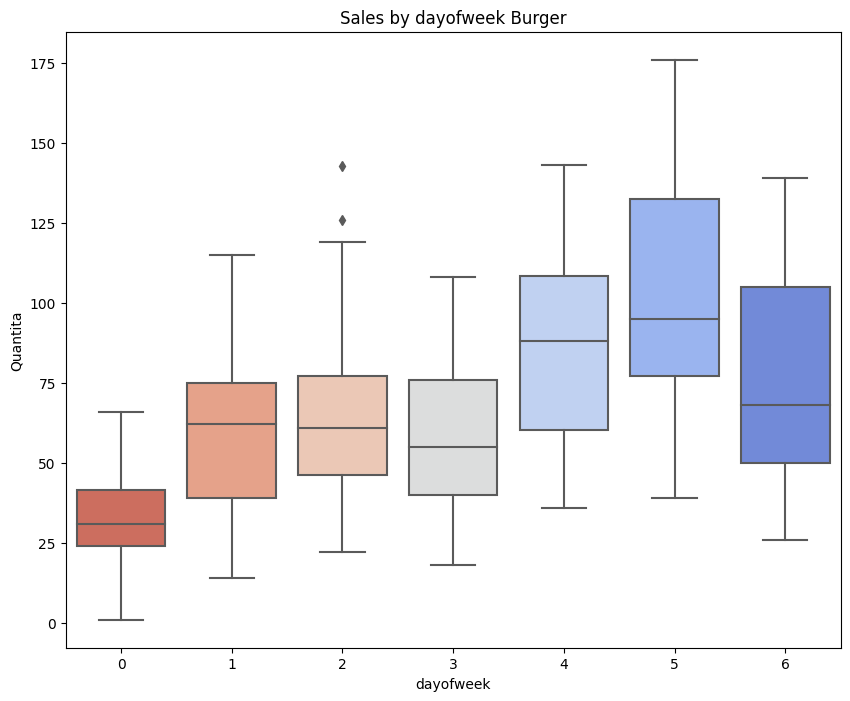

In [22]:
cat = 'Burger'
data = df_EDAburger

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofweek', y='Quantita', palette='coolwarm_r')
ax.set_title(f'Sales by dayofweek {cat}')
plt.show()

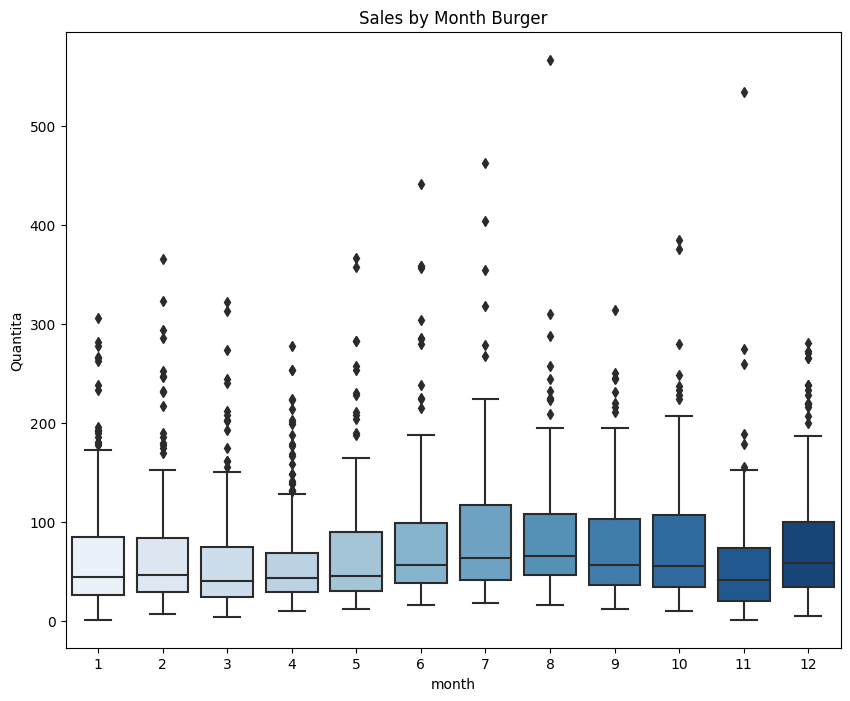

In [23]:
cat = 'Burger'
data = df_EDAburger

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y='Quantita', palette='Blues')
ax.set_title(f'Sales by Month {cat}')
plt.show()

### Fritti

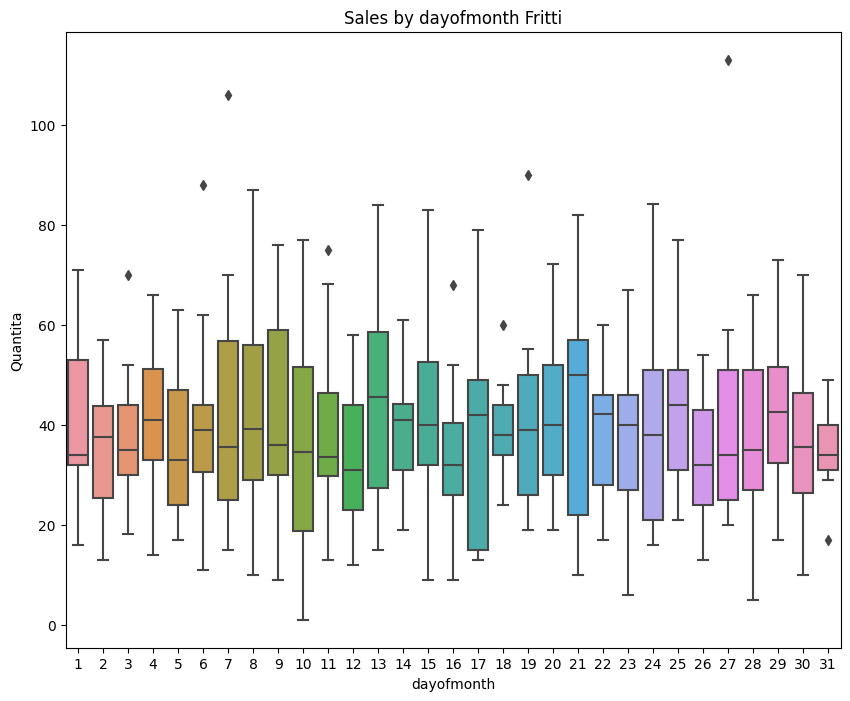

In [24]:
import seaborn as sns
cat = 'Fritti'
data = df_EDAfritti

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofmonth', y='Quantita')
ax.set_title(f'Sales by dayofmonth {cat}')
plt.show()

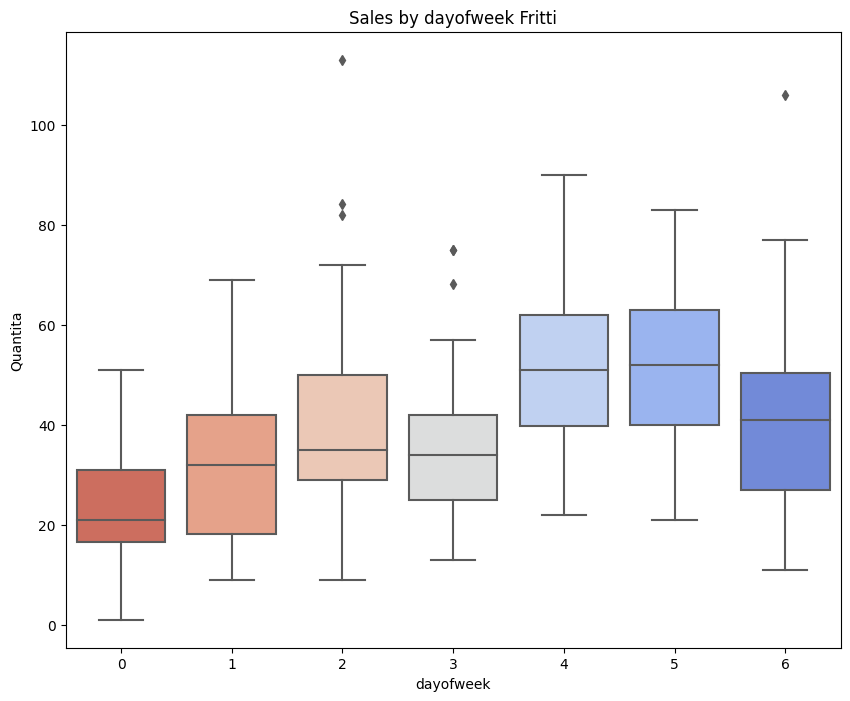

In [25]:
cat = 'Fritti'
data = df_EDAfritti

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofweek', y='Quantita', palette='coolwarm_r')
ax.set_title(f'Sales by dayofweek {cat}')
plt.show()

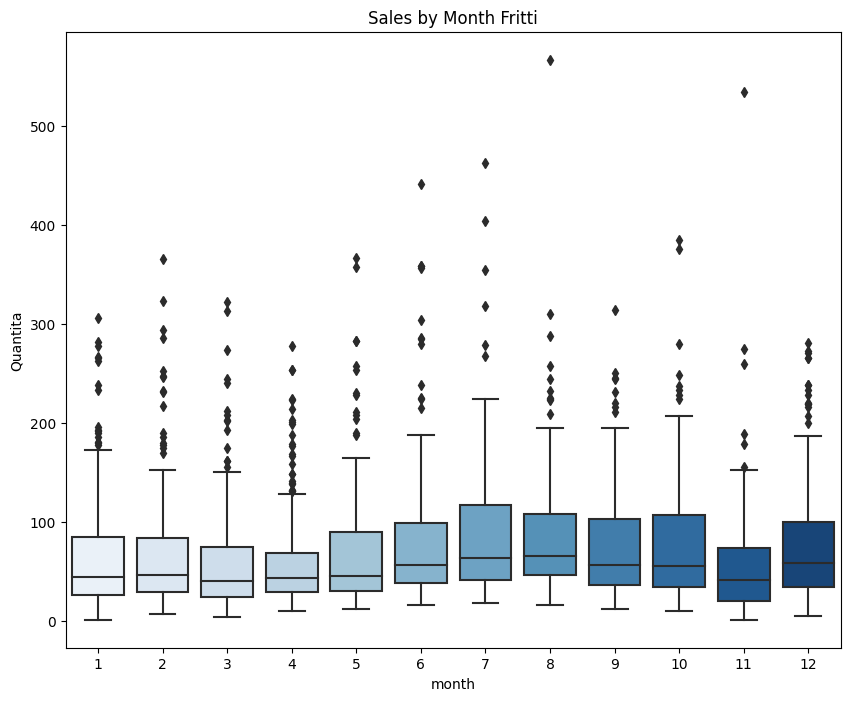

In [26]:
cat = 'Fritti'
data = df_EDAfritti

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y='Quantita', palette='Blues')
ax.set_title(f'Sales by Month {cat}')
plt.show()

### Bar

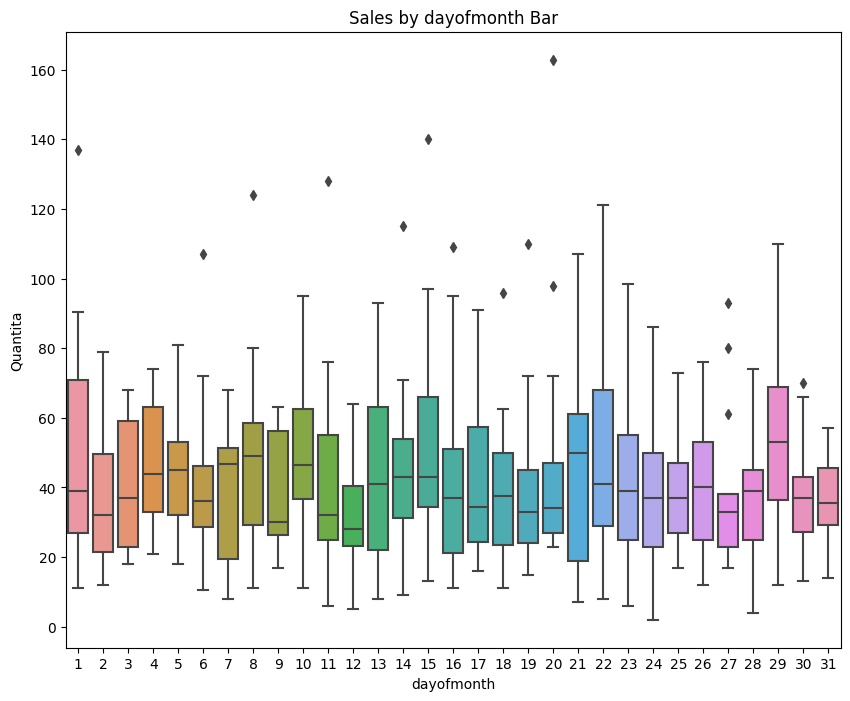

In [27]:
import seaborn as sns
cat = 'Bar'
data = df_EDAbar

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofmonth', y='Quantita')
ax.set_title(f'Sales by dayofmonth {cat}')
plt.show()

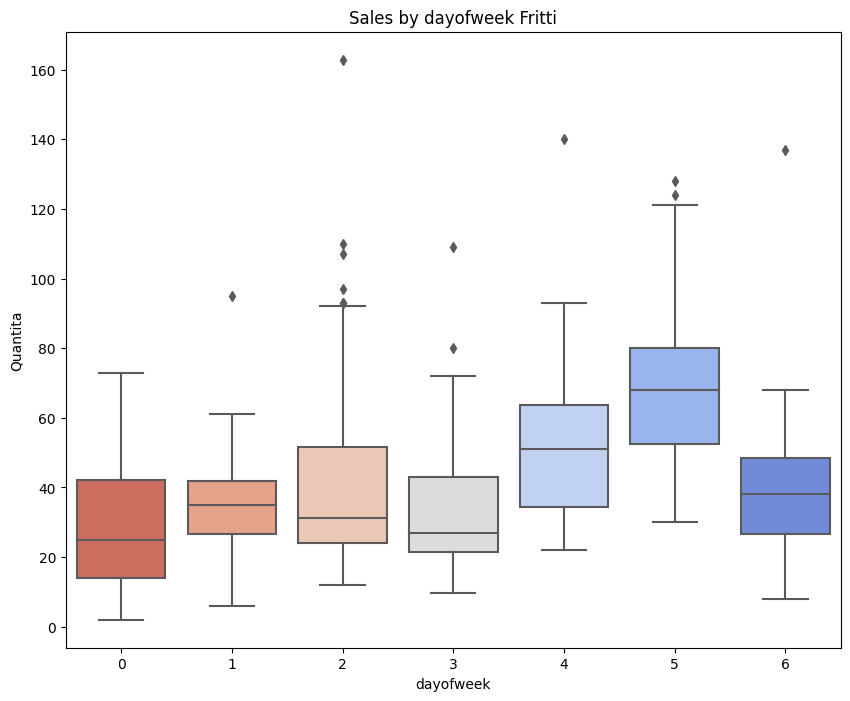

In [28]:
cat = 'Fritti'
data = df_EDAbar

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofweek', y='Quantita', palette='coolwarm_r')
ax.set_title(f'Sales by dayofweek {cat}')
plt.show()

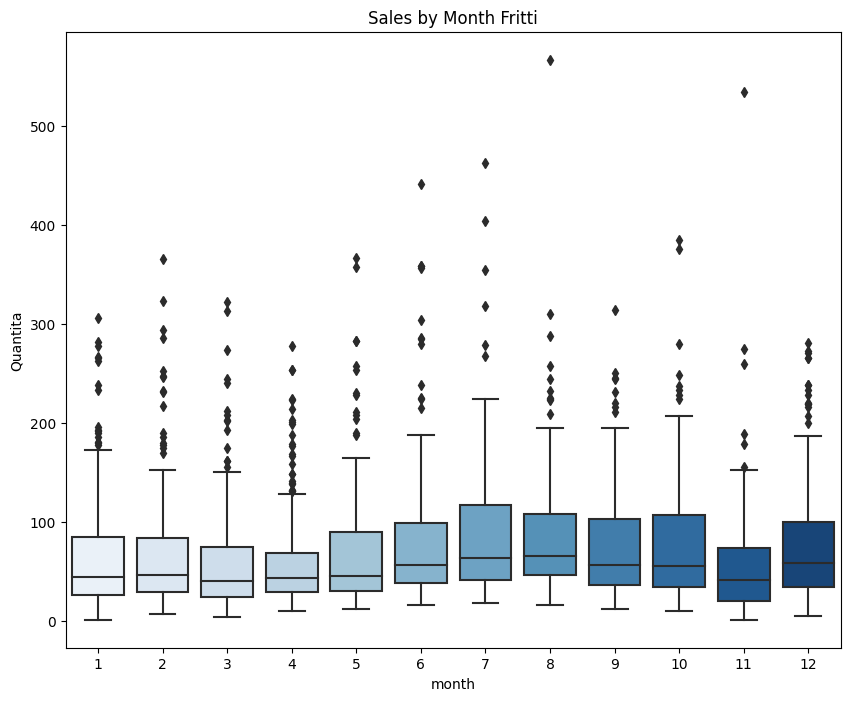

In [29]:
cat = 'Fritti'
data = df_EDAbar

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y='Quantita', palette='Blues')
ax.set_title(f'Sales by Month {cat}')
plt.show()

### Cocktail

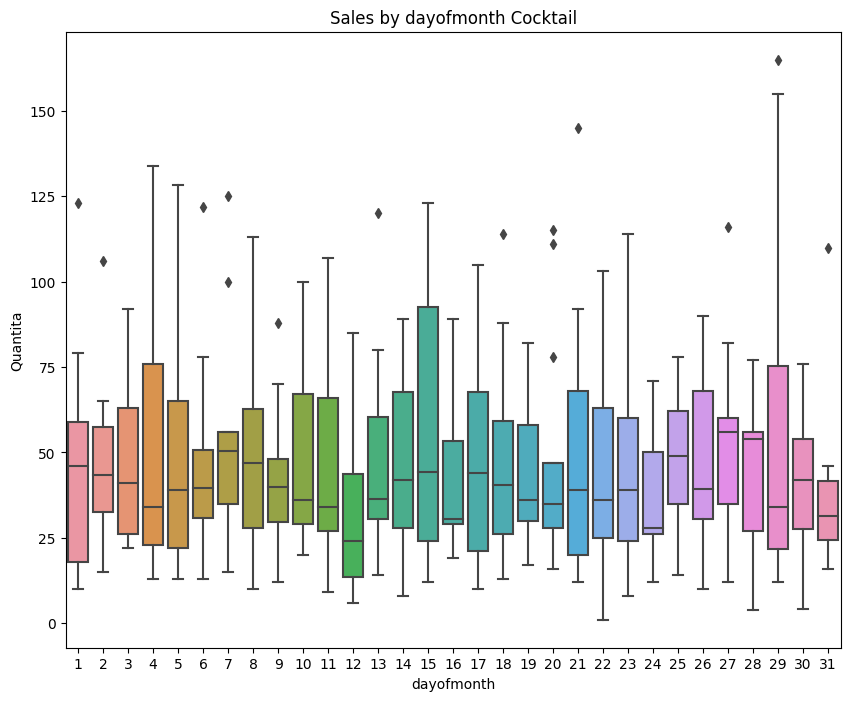

In [30]:
import seaborn as sns
cat = 'Cocktail'
data = df_EDAcocktail

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofmonth', y='Quantita')
ax.set_title(f'Sales by dayofmonth {cat}')
plt.show()

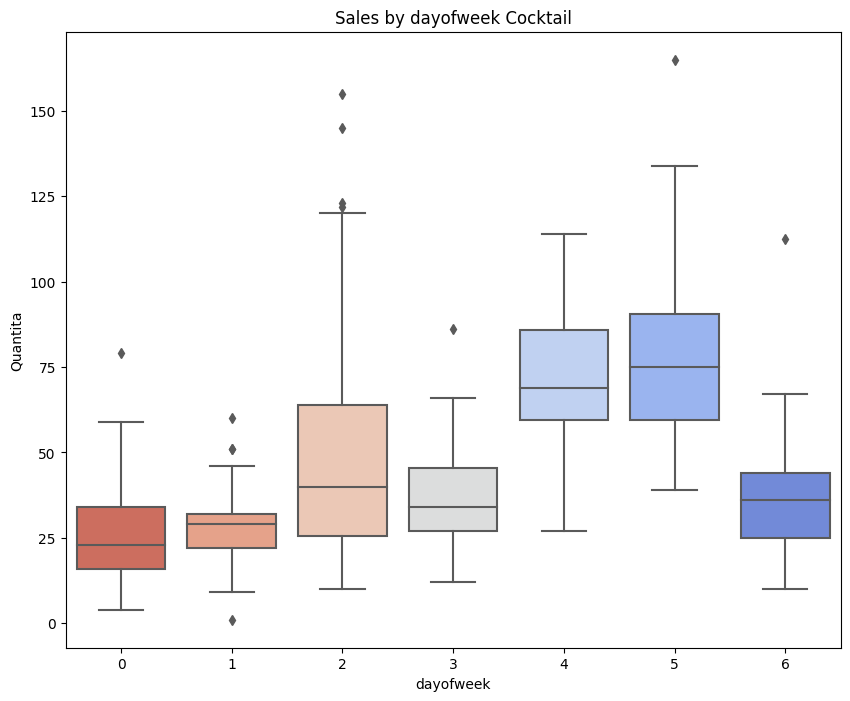

In [31]:
cat = 'Cocktail'
data = df_EDAcocktail

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data, x='dayofweek', y='Quantita', palette='coolwarm_r')
ax.set_title(f'Sales by dayofweek {cat}')
plt.show()

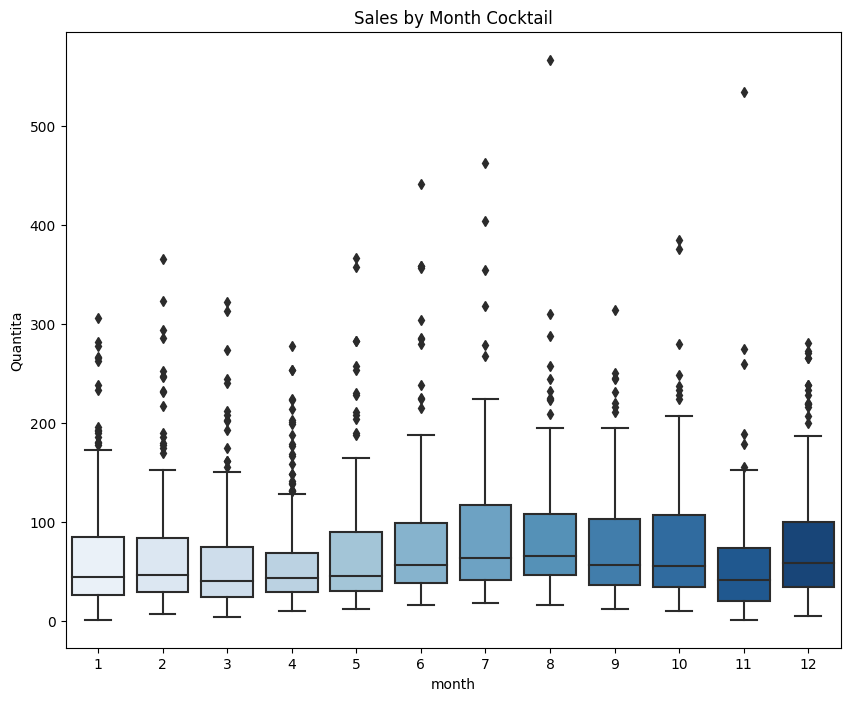

In [32]:
cat = 'Cocktail'
data = df_EDAcocktail

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_EDA, x='month', y='Quantita', palette='Blues')
ax.set_title(f'Sales by Month {cat}')
plt.show()

## Spine Prophet

In [67]:
df_spine

,Categoria,Quantita
Calendario,,
2022-01-02,Spine,111.00
2022-01-10,Spine,5.00
2022-01-11,Spine,55.00
2022-01-12,Spine,91.00
2022-01-13,Spine,93.00
...,...,...
2023-02-08,Spine,108.03
2023-02-09,Spine,135.00
2023-02-10,Spine,322.92


In [69]:
df = df_spine[['Quantita']].copy()
df

,Quantita
Calendario,
2022-01-02,111.00
2022-01-10,5.00
2022-01-11,55.00
2022-01-12,91.00
2022-01-13,93.00
...,...
2023-02-08,108.03
2023-02-09,135.00
2023-02-10,322.92


In [70]:
df = df.reset_index()
df

,Calendario,Quantita
0,2022-01-02,111.00
1,2022-01-10,5.00
2,2022-01-11,55.00
3,2022-01-12,91.00
4,2022-01-13,93.00
...,...,...
378,2023-02-08,108.03
379,2023-02-09,135.00
380,2023-02-10,322.92
381,2023-02-11,231.04


In [71]:
## OBBLIGO!!!
df.columns = ['ds','y']
df

,ds,y
0,2022-01-02,111.00
1,2022-01-10,5.00
2,2022-01-11,55.00
3,2022-01-12,91.00
4,2022-01-13,93.00
...,...,...
378,2023-02-08,108.03
379,2023-02-09,135.00
380,2023-02-10,322.92
381,2023-02-11,231.04


## Create and Fit Model

In [72]:
# This is fitting on all the data (no train test split in this example)
#default is additive but using param anyway, increasing default confidience interval from .8 to .95
m = Prophet(seasonality_mode='additive', 
            interval_width=0.95
            )
model = m.fit(df)

20:13:35 - cmdstanpy - INFO - Chain [1] start processing
20:13:35 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [73]:
future = model.make_future_dataframe(periods=30, freq ='D')

In [74]:
future.tail()

,ds
408,2023-03-10
409,2023-03-11
410,2023-03-12
411,2023-03-13
412,2023-03-14


In [75]:
len(df)

383

In [77]:
len(future) # 383 past +30 forecast future

413


### Step 2: Predict and fill in the Future

In [78]:
forecast = model.predict(future)

In [79]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-02,130.076578,-12.272217,211.741174,130.076578,130.076578,-32.662081,-32.662081,-32.662081,-32.662081,-32.662081,-32.662081,0.0,0.0,0.0,97.414497
1,2022-01-10,132.866738,-44.999557,186.471884,132.866738,132.866738,-62.745895,-62.745895,-62.745895,-62.745895,-62.745895,-62.745895,0.0,0.0,0.0,70.120843
2,2022-01-11,133.215508,-17.950581,212.538669,133.215508,133.215508,-37.343513,-37.343513,-37.343513,-37.343513,-37.343513,-37.343513,0.0,0.0,0.0,95.871996
3,2022-01-12,133.564279,39.828969,276.696540,133.564279,133.564279,27.442584,27.442584,27.442584,27.442584,27.442584,27.442584,0.0,0.0,0.0,161.006863
4,2022-01-13,133.913049,0.108527,244.503533,133.913049,133.913049,-4.751093,-4.751093,-4.751093,-4.751093,-4.751093,-4.751093,0.0,0.0,0.0,129.161956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2023-03-10,163.992482,112.411957,343.833741,162.997045,165.081323,63.152622,63.152622,63.152622,63.152622,63.152622,63.152622,0.0,0.0,0.0,227.145104
409,2023-03-11,163.867234,88.407330,323.076054,162.779357,165.011661,46.907375,46.907375,46.907375,46.907375,46.907375,46.907375,0.0,0.0,0.0,210.774610
410,2023-03-12,163.741987,3.489740,252.630439,162.590883,164.979774,-32.662081,-32.662081,-32.662081,-32.662081,-32.662081,-32.662081,0.0,0.0,0.0,131.079906
411,2023-03-13,163.616739,-15.839288,229.735221,162.393544,164.909348,-62.745895,-62.745895,-62.745895,-62.745895,-62.745895,-62.745895,0.0,0.0,0.0,100.870844


In [80]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [81]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
388,2023-02-18,213.404806,100.215093,330.503315
389,2023-02-19,133.710103,12.594224,257.264669
390,2023-02-20,103.501041,-9.797540,218.287159
391,2023-02-21,128.778176,5.102904,246.482601
392,2023-02-22,193.439025,84.621038,306.002673
393,2023-02-23,161.120101,44.063545,284.136726
394,2023-02-24,228.898569,107.758002,342.355046
395,2023-02-25,212.528074,102.686764,332.531742
396,2023-02-26,132.833370,15.230489,247.849820
397,2023-02-27,102.624309,-21.259207,219.590837


### Plotting Forecast

We can use Prophet's own built in plotting tools

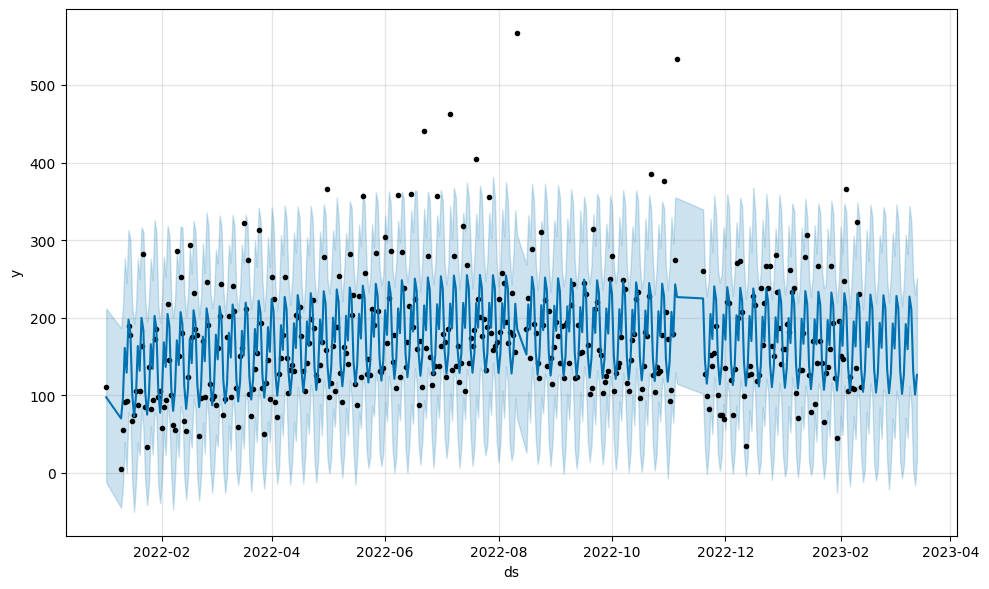

In [82]:
model.plot(forecast);

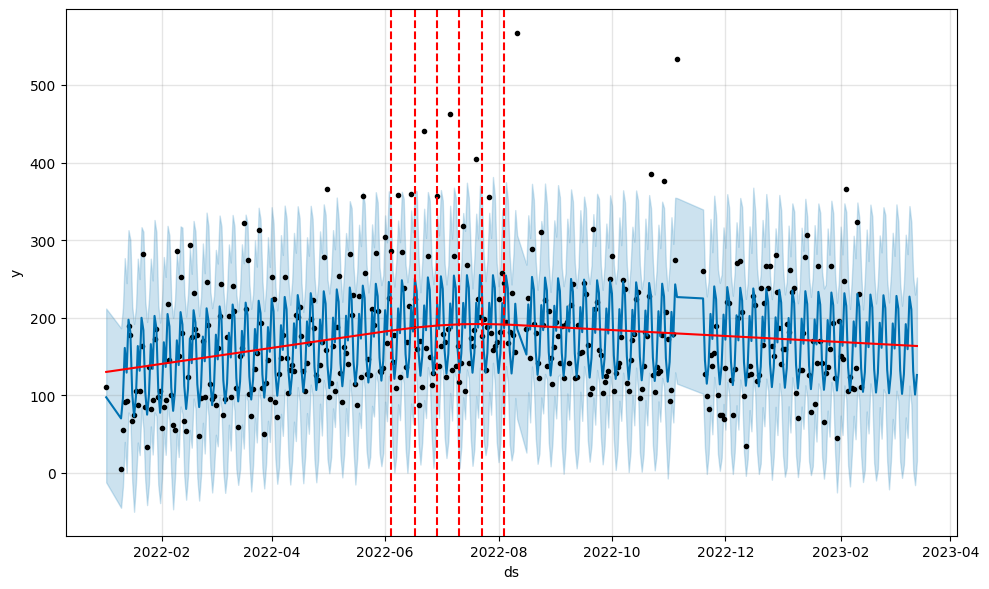

In [83]:
from prophet.plot import add_changepoints_to_plot

plot1 = model.plot(forecast)
a = add_changepoints_to_plot(plot1.gca(),model,forecast)

In [84]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="Quantita",
                  xaxis_title="Data",
                  title="Spine",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

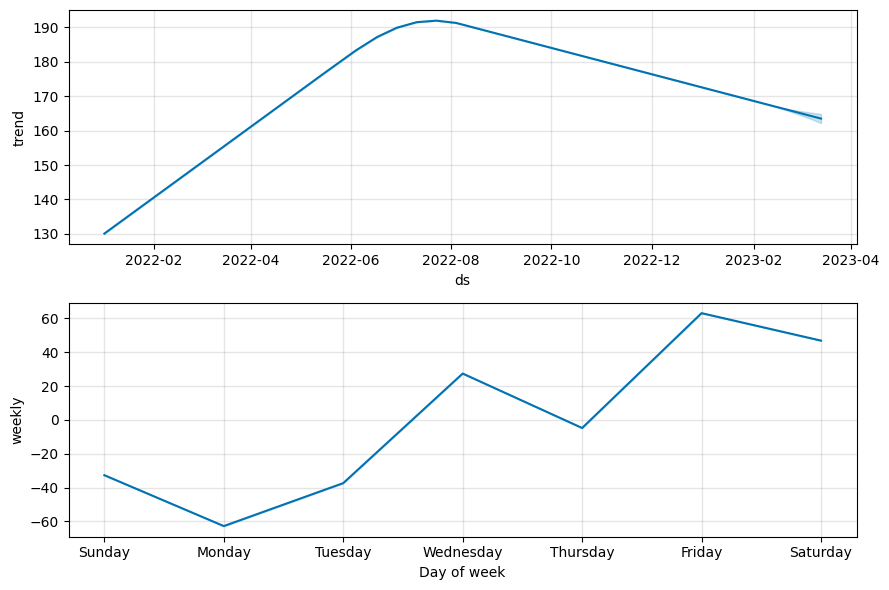

In [85]:
model.plot_components(forecast);

In [86]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.tail()


# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values

mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

mse_01 = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse_01)

mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape_01)

MAE: 42.169
MSE: 3607.708
MAPE: 0.305


## Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation

#shift --> period

df_cv = cross_validation(model,horizon="30 days",
                        period='14 days',
                        initial='150 days',
                        #parallel="dask"#need to install dask
                        )

  0%|          | 0/26 [00:00<?, ?it/s]

17:29:14 - cmdstanpy - INFO - Chain [1] start processing
17:29:14 - cmdstanpy - INFO - Chain [1] done processing
17:29:16 - cmdstanpy - INFO - Chain [1] start processing
17:29:16 - cmdstanpy - INFO - Chain [1] done processing
17:29:17 - cmdstanpy - INFO - Chain [1] start processing
17:29:17 - cmdstanpy - INFO - Chain [1] done processing
17:29:18 - cmdstanpy - INFO - Chain [1] start processing
17:29:18 - cmdstanpy - INFO - Chain [1] done processing
17:29:20 - cmdstanpy - INFO - Chain [1] start processing
17:29:20 - cmdstanpy - INFO - Chain [1] done processing
17:29:21 - cmdstanpy - INFO - Chain [1] start processing
17:29:21 - cmdstanpy - INFO - Chain [1] done processing
17:29:23 - cmdstanpy - INFO - Chain [1] start processing
17:29:23 - cmdstanpy - INFO - Chain [1] done processing
17:29:26 - cmdstanpy - INFO - Chain [1] start processing
17:29:26 - cmdstanpy - INFO - Chain [1] done processing
17:29:27 - cmdstanpy - INFO - Chain [1] start processing
17:29:27 - cmdstanpy - INFO - Chain [1]

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-10-14,232.814993,77.189011,375.594776,141.00,2021-10-13
1,2021-10-15,277.145069,136.532185,436.618979,379.00,2021-10-13
2,2021-10-16,261.607831,124.089469,422.314776,302.00,2021-10-13
3,2021-10-17,180.281674,23.133254,343.190311,186.00,2021-10-13
4,2021-10-18,151.441093,-3.285622,316.638412,103.00,2021-10-13
...,...,...,...,...,...,...
736,2022-11-05,242.126316,101.580161,362.423833,534.01,2022-10-23
737,2022-11-19,244.522873,112.444738,378.196842,259.65,2022-10-23
738,2022-11-20,168.668098,42.649104,296.288526,127.04,2022-10-23
739,2022-11-21,137.325709,9.075210,262.417399,99.00,2022-10-23


In [ ]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4142.302018,64.360718,41.564354,0.247709,0.195151,0.245910,0.986486
1,4 days,4508.782095,67.147465,45.681064,0.287174,0.221572,0.278234,0.974012
2,5 days,5003.816816,70.737662,52.640002,0.357543,0.289273,0.339618,0.945946
3,6 days,6287.559475,79.294133,60.853001,0.415632,0.367724,0.379140,0.932432
4,7 days,6151.625498,78.432299,59.999890,0.383275,0.366203,0.361294,0.945946


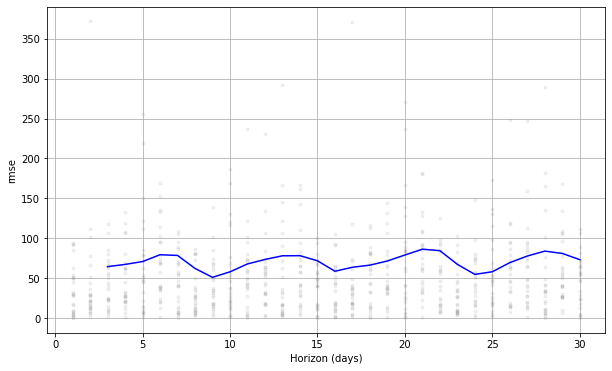

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

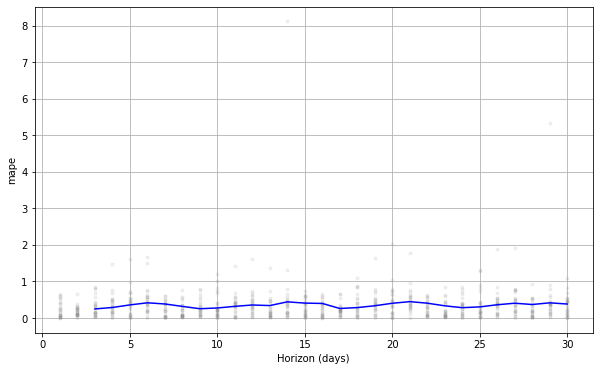

In [ ]:
fig=plot_cross_validation_metric(df_cv,metric='mape')

In [ ]:
df_performance.mean()

horizon     16 days 12:00:00
mse               5057.71569
rmse               70.507984
mae                52.100424
mape                 0.34921
mdape               0.279264
smape               0.332274
coverage             0.95027
dtype: object

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd


#'changepoint_range': [0.6, 0.7, 0.75, 0.8, 0.9],
#'holidays_prior_scale':[1.0, 5.0, 10.0, 15.0],
#'yearly_seasonality':[5, 10, 15, 20],
#'weekly_seasonality':[5, 10, 15, 20],

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(seasonality_mode='additive', 
                    interval_width=0.95,
                    **params).fit(df)  # Fit model with given params
    df_cv = cross_validation(model, 
                             horizon="30 days",
                             period='15 days', #shift - moving windows
                             initial='150 days', 
                             )
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

15:29:25 - cmdstanpy - INFO - Chain [1] start processing
15:29:25 - cmdstanpy - INFO - Chain [1] done processing
15:29:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:29:25 - cmdstanpy - INFO - Chain [1] start processing
15:29:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/26 [00:00<?, ?it/s]

15:29:26 - cmdstanpy - INFO - Chain [1] start processing
15:29:26 - cmdstanpy - INFO - Chain [1] done processing
15:29:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:29:27 - cmdstanpy - INFO - Chain [1] start processing
15:29:27 - cmdstanpy - INFO - Chain [1] done processing
15:29:29 - cmdstanpy - INFO - Chain [1] start processing
15:29:29 - cmdstanpy - INFO - Chain [1] done processing
15:29:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:29:29 - cmdstanpy - INFO - Chain [1] start processing
15:29:30 - cmdstanpy - INFO - Chain [1] done processing
15:29:31 - cmdstanpy - INFO - Chain [1] start processing
15:29:32 - cmdstanpy - INFO - Chain [1] done processing
15:29:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newto

  0%|          | 0/26 [00:00<?, ?it/s]

15:30:24 - cmdstanpy - INFO - Chain [1] start processing
15:30:24 - cmdstanpy - INFO - Chain [1] done processing
15:30:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:30:24 - cmdstanpy - INFO - Chain [1] start processing
15:30:24 - cmdstanpy - INFO - Chain [1] done processing
15:30:25 - cmdstanpy - INFO - Chain [1] start processing
15:30:25 - cmdstanpy - INFO - Chain [1] done processing
15:30:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:30:25 - cmdstanpy - INFO - Chain [1] start processing
15:30:26 - cmdstanpy - INFO - Chain [1] done processing
15:30:27 - cmdstanpy - INFO - Chain [1] start processing
15:30:27 - cmdstanpy - INFO - Chain [1] done processing
15:30:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newto

  0%|          | 0/26 [00:00<?, ?it/s]

15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:31:29 - cmdstanpy - INFO - Chain [1] start processing
15:31:29 - cmdstanpy - INFO - Chain [1] done processing
15:31:31 - cmdstanpy - INFO - Chain [1] start processing
15:31:31 - cmdstanpy - INFO - Chain [1] done processing
15:31:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:31:31 - cmdstanpy - INFO - Chain [1] start processing
15:31:32 - cmdstanpy - INFO - Chain [1] done processing
15:31:33 - cmdstanpy - INFO - Chain [1] start processing
15:31:33 - cmdstanpy - INFO - Chain [1] done processing
15:31:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newto

  0%|          | 0/26 [00:00<?, ?it/s]

15:32:24 - cmdstanpy - INFO - Chain [1] start processing
15:32:24 - cmdstanpy - INFO - Chain [1] done processing
15:32:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:32:24 - cmdstanpy - INFO - Chain [1] start processing
15:32:25 - cmdstanpy - INFO - Chain [1] done processing
15:32:26 - cmdstanpy - INFO - Chain [1] start processing
15:32:26 - cmdstanpy - INFO - Chain [1] done processing
15:32:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
15:32:26 - cmdstanpy - INFO - Chain [1] start processing
15:32:26 - cmdstanpy - INFO - Chain [1] done processing
15:32:28 - cmdstanpy - INFO - Chain [1] start processing
15:32:28 - cmdstanpy - INFO - Chain [1] done processing
15:32:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newto

  0%|          | 0/26 [00:00<?, ?it/s]

15:33:19 - cmdstanpy - INFO - Chain [1] start processing
15:33:19 - cmdstanpy - INFO - Chain [1] done processing
15:33:21 - cmdstanpy - INFO - Chain [1] start processing
15:33:21 - cmdstanpy - INFO - Chain [1] done processing
15:33:23 - cmdstanpy - INFO - Chain [1] start processing
15:33:23 - cmdstanpy - INFO - Chain [1] done processing
15:33:25 - cmdstanpy - INFO - Chain [1] start processing
15:33:25 - cmdstanpy - INFO - Chain [1] done processing
15:33:26 - cmdstanpy - INFO - Chain [1] start processing
15:33:26 - cmdstanpy - INFO - Chain [1] done processing
15:33:28 - cmdstanpy - INFO - Chain [1] start processing
15:33:28 - cmdstanpy - INFO - Chain [1] done processing
15:33:29 - cmdstanpy - INFO - Chain [1] start processing
15:33:29 - cmdstanpy - INFO - Chain [1] done processing
15:33:31 - cmdstanpy - INFO - Chain [1] start processing
15:33:31 - cmdstanpy - INFO - Chain [1] done processing
15:33:32 - cmdstanpy - INFO - Chain [1] start processing
15:33:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:34:04 - cmdstanpy - INFO - Chain [1] start processing
15:34:04 - cmdstanpy - INFO - Chain [1] done processing
15:34:06 - cmdstanpy - INFO - Chain [1] start processing
15:34:06 - cmdstanpy - INFO - Chain [1] done processing
15:34:08 - cmdstanpy - INFO - Chain [1] start processing
15:34:08 - cmdstanpy - INFO - Chain [1] done processing
15:34:10 - cmdstanpy - INFO - Chain [1] start processing
15:34:10 - cmdstanpy - INFO - Chain [1] done processing
15:34:13 - cmdstanpy - INFO - Chain [1] start processing
15:34:13 - cmdstanpy - INFO - Chain [1] done processing
15:34:16 - cmdstanpy - INFO - Chain [1] start processing
15:34:16 - cmdstanpy - INFO - Chain [1] done processing
15:34:19 - cmdstanpy - INFO - Chain [1] start processing
15:34:19 - cmdstanpy - INFO - Chain [1] done processing
15:34:21 - cmdstanpy - INFO - Chain [1] start processing
15:34:21 - cmdstanpy - INFO - Chain [1] done processing
15:34:24 - cmdstanpy - INFO - Chain [1] start processing
15:34:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:34:59 - cmdstanpy - INFO - Chain [1] start processing
15:34:59 - cmdstanpy - INFO - Chain [1] done processing
15:35:02 - cmdstanpy - INFO - Chain [1] start processing
15:35:02 - cmdstanpy - INFO - Chain [1] done processing
15:35:04 - cmdstanpy - INFO - Chain [1] start processing
15:35:04 - cmdstanpy - INFO - Chain [1] done processing
15:35:06 - cmdstanpy - INFO - Chain [1] start processing
15:35:06 - cmdstanpy - INFO - Chain [1] done processing
15:35:08 - cmdstanpy - INFO - Chain [1] start processing
15:35:08 - cmdstanpy - INFO - Chain [1] done processing
15:35:09 - cmdstanpy - INFO - Chain [1] start processing
15:35:09 - cmdstanpy - INFO - Chain [1] done processing
15:35:11 - cmdstanpy - INFO - Chain [1] start processing
15:35:11 - cmdstanpy - INFO - Chain [1] done processing
15:35:12 - cmdstanpy - INFO - Chain [1] start processing
15:35:12 - cmdstanpy - INFO - Chain [1] done processing
15:35:14 - cmdstanpy - INFO - Chain [1] start processing
15:35:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:35:41 - cmdstanpy - INFO - Chain [1] start processing
15:35:41 - cmdstanpy - INFO - Chain [1] done processing
15:35:43 - cmdstanpy - INFO - Chain [1] start processing
15:35:43 - cmdstanpy - INFO - Chain [1] done processing
15:35:44 - cmdstanpy - INFO - Chain [1] start processing
15:35:44 - cmdstanpy - INFO - Chain [1] done processing
15:35:45 - cmdstanpy - INFO - Chain [1] start processing
15:35:45 - cmdstanpy - INFO - Chain [1] done processing
15:35:47 - cmdstanpy - INFO - Chain [1] start processing
15:35:47 - cmdstanpy - INFO - Chain [1] done processing
15:35:49 - cmdstanpy - INFO - Chain [1] start processing
15:35:49 - cmdstanpy - INFO - Chain [1] done processing
15:35:50 - cmdstanpy - INFO - Chain [1] start processing
15:35:50 - cmdstanpy - INFO - Chain [1] done processing
15:35:52 - cmdstanpy - INFO - Chain [1] start processing
15:35:52 - cmdstanpy - INFO - Chain [1] done processing
15:35:54 - cmdstanpy - INFO - Chain [1] start processing
15:35:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:36:22 - cmdstanpy - INFO - Chain [1] start processing
15:36:22 - cmdstanpy - INFO - Chain [1] done processing
15:36:23 - cmdstanpy - INFO - Chain [1] start processing
15:36:23 - cmdstanpy - INFO - Chain [1] done processing
15:36:25 - cmdstanpy - INFO - Chain [1] start processing
15:36:25 - cmdstanpy - INFO - Chain [1] done processing
15:36:26 - cmdstanpy - INFO - Chain [1] start processing
15:36:26 - cmdstanpy - INFO - Chain [1] done processing
15:36:27 - cmdstanpy - INFO - Chain [1] start processing
15:36:27 - cmdstanpy - INFO - Chain [1] done processing
15:36:29 - cmdstanpy - INFO - Chain [1] start processing
15:36:29 - cmdstanpy - INFO - Chain [1] done processing
15:36:30 - cmdstanpy - INFO - Chain [1] start processing
15:36:30 - cmdstanpy - INFO - Chain [1] done processing
15:36:32 - cmdstanpy - INFO - Chain [1] start processing
15:36:32 - cmdstanpy - INFO - Chain [1] done processing
15:36:33 - cmdstanpy - INFO - Chain [1] start processing
15:36:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:37:12 - cmdstanpy - INFO - Chain [1] start processing
15:37:12 - cmdstanpy - INFO - Chain [1] done processing
15:37:13 - cmdstanpy - INFO - Chain [1] start processing
15:37:13 - cmdstanpy - INFO - Chain [1] done processing
15:37:16 - cmdstanpy - INFO - Chain [1] start processing
15:37:16 - cmdstanpy - INFO - Chain [1] done processing
15:37:18 - cmdstanpy - INFO - Chain [1] start processing
15:37:18 - cmdstanpy - INFO - Chain [1] done processing
15:37:20 - cmdstanpy - INFO - Chain [1] start processing
15:37:20 - cmdstanpy - INFO - Chain [1] done processing
15:37:23 - cmdstanpy - INFO - Chain [1] start processing
15:37:23 - cmdstanpy - INFO - Chain [1] done processing
15:37:25 - cmdstanpy - INFO - Chain [1] start processing
15:37:25 - cmdstanpy - INFO - Chain [1] done processing
15:37:28 - cmdstanpy - INFO - Chain [1] start processing
15:37:28 - cmdstanpy - INFO - Chain [1] done processing
15:37:30 - cmdstanpy - INFO - Chain [1] start processing
15:37:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:38:09 - cmdstanpy - INFO - Chain [1] start processing
15:38:09 - cmdstanpy - INFO - Chain [1] done processing
15:38:11 - cmdstanpy - INFO - Chain [1] start processing
15:38:11 - cmdstanpy - INFO - Chain [1] done processing
15:38:13 - cmdstanpy - INFO - Chain [1] start processing
15:38:13 - cmdstanpy - INFO - Chain [1] done processing
15:38:15 - cmdstanpy - INFO - Chain [1] start processing
15:38:15 - cmdstanpy - INFO - Chain [1] done processing
15:38:17 - cmdstanpy - INFO - Chain [1] start processing
15:38:17 - cmdstanpy - INFO - Chain [1] done processing
15:38:19 - cmdstanpy - INFO - Chain [1] start processing
15:38:19 - cmdstanpy - INFO - Chain [1] done processing
15:38:22 - cmdstanpy - INFO - Chain [1] start processing
15:38:22 - cmdstanpy - INFO - Chain [1] done processing
15:38:24 - cmdstanpy - INFO - Chain [1] start processing
15:38:24 - cmdstanpy - INFO - Chain [1] done processing
15:38:26 - cmdstanpy - INFO - Chain [1] start processing
15:38:26 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:38:54 - cmdstanpy - INFO - Chain [1] start processing
15:38:54 - cmdstanpy - INFO - Chain [1] done processing
15:38:56 - cmdstanpy - INFO - Chain [1] start processing
15:38:56 - cmdstanpy - INFO - Chain [1] done processing
15:38:58 - cmdstanpy - INFO - Chain [1] start processing
15:38:58 - cmdstanpy - INFO - Chain [1] done processing
15:38:59 - cmdstanpy - INFO - Chain [1] start processing
15:38:59 - cmdstanpy - INFO - Chain [1] done processing
15:39:01 - cmdstanpy - INFO - Chain [1] start processing
15:39:01 - cmdstanpy - INFO - Chain [1] done processing
15:39:03 - cmdstanpy - INFO - Chain [1] start processing
15:39:03 - cmdstanpy - INFO - Chain [1] done processing
15:39:05 - cmdstanpy - INFO - Chain [1] start processing
15:39:05 - cmdstanpy - INFO - Chain [1] done processing
15:39:07 - cmdstanpy - INFO - Chain [1] start processing
15:39:07 - cmdstanpy - INFO - Chain [1] done processing
15:39:08 - cmdstanpy - INFO - Chain [1] start processing
15:39:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:39:35 - cmdstanpy - INFO - Chain [1] start processing
15:39:35 - cmdstanpy - INFO - Chain [1] done processing
15:39:36 - cmdstanpy - INFO - Chain [1] start processing
15:39:36 - cmdstanpy - INFO - Chain [1] done processing
15:39:37 - cmdstanpy - INFO - Chain [1] start processing
15:39:38 - cmdstanpy - INFO - Chain [1] done processing
15:39:39 - cmdstanpy - INFO - Chain [1] start processing
15:39:39 - cmdstanpy - INFO - Chain [1] done processing
15:39:41 - cmdstanpy - INFO - Chain [1] start processing
15:39:41 - cmdstanpy - INFO - Chain [1] done processing
15:39:43 - cmdstanpy - INFO - Chain [1] start processing
15:39:43 - cmdstanpy - INFO - Chain [1] done processing
15:39:44 - cmdstanpy - INFO - Chain [1] start processing
15:39:44 - cmdstanpy - INFO - Chain [1] done processing
15:39:45 - cmdstanpy - INFO - Chain [1] start processing
15:39:45 - cmdstanpy - INFO - Chain [1] done processing
15:39:47 - cmdstanpy - INFO - Chain [1] start processing
15:39:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:40:14 - cmdstanpy - INFO - Chain [1] start processing
15:40:14 - cmdstanpy - INFO - Chain [1] done processing
15:40:16 - cmdstanpy - INFO - Chain [1] start processing
15:40:16 - cmdstanpy - INFO - Chain [1] done processing
15:40:17 - cmdstanpy - INFO - Chain [1] start processing
15:40:17 - cmdstanpy - INFO - Chain [1] done processing
15:40:19 - cmdstanpy - INFO - Chain [1] start processing
15:40:19 - cmdstanpy - INFO - Chain [1] done processing
15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] done processing
15:40:22 - cmdstanpy - INFO - Chain [1] start processing
15:40:22 - cmdstanpy - INFO - Chain [1] done processing
15:40:23 - cmdstanpy - INFO - Chain [1] start processing
15:40:23 - cmdstanpy - INFO - Chain [1] done processing
15:40:25 - cmdstanpy - INFO - Chain [1] start processing
15:40:25 - cmdstanpy - INFO - Chain [1] done processing
15:40:26 - cmdstanpy - INFO - Chain [1] start processing
15:40:26 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:40:53 - cmdstanpy - INFO - Chain [1] start processing
15:40:53 - cmdstanpy - INFO - Chain [1] done processing
15:40:55 - cmdstanpy - INFO - Chain [1] start processing
15:40:55 - cmdstanpy - INFO - Chain [1] done processing
15:40:56 - cmdstanpy - INFO - Chain [1] start processing
15:40:56 - cmdstanpy - INFO - Chain [1] done processing
15:40:58 - cmdstanpy - INFO - Chain [1] start processing
15:40:58 - cmdstanpy - INFO - Chain [1] done processing
15:40:59 - cmdstanpy - INFO - Chain [1] start processing
15:40:59 - cmdstanpy - INFO - Chain [1] done processing
15:41:00 - cmdstanpy - INFO - Chain [1] start processing
15:41:00 - cmdstanpy - INFO - Chain [1] done processing
15:41:02 - cmdstanpy - INFO - Chain [1] start processing
15:41:02 - cmdstanpy - INFO - Chain [1] done processing
15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
15:41:05 - cmdstanpy - INFO - Chain [1] start processing
15:41:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/26 [00:00<?, ?it/s]

15:41:42 - cmdstanpy - INFO - Chain [1] start processing
15:41:42 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:49 - cmdstanpy - INFO - Chain [1] start processing
15:41:49 - cmdstanpy - INFO - Chain [1] done processing
15:41:52 - cmdstanpy - INFO - Chain [1] start processing
15:41:52 - cmdstanpy - INFO - Chain [1] done processing
15:41:53 - cmdstanpy - INFO - Chain [1] start processing
15:41:53 - cmdstanpy - INFO - Chain [1] done processing
15:41:56 - cmdstanpy - INFO - Chain [1] start processing
15:41:56 - cmdstanpy - INFO - Chain [1] done processing
15:41:59 - cmdstanpy - INFO - Chain [1] start processing
15:41:59 - cmdstanpy - INFO - Chain [1] done processing
15:42:02 - cmdstanpy - INFO - Chain [1] start processing
15:42:02 - cmdstanpy - INFO - Chain [1] done processing
15:42:05 - cmdstanpy - INFO - Chain [1] start processing
15:42:05 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  112.261487
1                     0.001                     0.10  110.464095
2                     0.001                     1.00  110.155070
3                     0.001                    10.00  110.636669
4                     0.010                     0.01   81.617702
5                     0.010                     0.10   79.125553
6                     0.010                     1.00   80.045057
7                     0.010                    10.00   79.650925
8                     0.100                     0.01   70.315445
9                     0.100                     0.10   68.212245
10                    0.100                     1.00   68.258830
11                    0.100                    10.00   68.203894
12                    0.500                     0.01   67.639112
13                    0.500                     0.10   66.080492
14                    0.5

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}


In [ ]:
model_tuned = Prophet(seasonality_mode='additive', 
                      interval_width=0.95,
                      changepoint_prior_scale=0.5,
                      seasonality_prior_scale=0.1,
                     )
model_tuned.fit(df)

17:30:36 - cmdstanpy - INFO - Chain [1] start processing
17:30:36 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_cv_final=cross_validation(model_tuned,horizon="30 days",
                             period='15 days',
                             initial='150 days',
                             #parallel="dask"#need to install dask
                            )

  0%|          | 0/26 [00:00<?, ?it/s]

17:30:37 - cmdstanpy - INFO - Chain [1] start processing
17:30:37 - cmdstanpy - INFO - Chain [1] done processing
17:30:38 - cmdstanpy - INFO - Chain [1] start processing
17:30:38 - cmdstanpy - INFO - Chain [1] done processing
17:30:39 - cmdstanpy - INFO - Chain [1] start processing
17:30:39 - cmdstanpy - INFO - Chain [1] done processing
17:30:41 - cmdstanpy - INFO - Chain [1] start processing
17:30:41 - cmdstanpy - INFO - Chain [1] done processing
17:30:42 - cmdstanpy - INFO - Chain [1] start processing
17:30:42 - cmdstanpy - INFO - Chain [1] done processing
17:30:43 - cmdstanpy - INFO - Chain [1] start processing
17:30:43 - cmdstanpy - INFO - Chain [1] done processing
17:30:44 - cmdstanpy - INFO - Chain [1] start processing
17:30:44 - cmdstanpy - INFO - Chain [1] done processing
17:30:46 - cmdstanpy - INFO - Chain [1] start processing
17:30:46 - cmdstanpy - INFO - Chain [1] done processing
17:30:47 - cmdstanpy - INFO - Chain [1] start processing
17:30:47 - cmdstanpy - INFO - Chain [1]

In [ ]:
df_performance = performance_metrics(df_cv_final)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4086.139884,63.922921,40.785493,0.238149,0.194070,0.231143,0.986486
1,4 days,4376.058280,66.151782,44.465096,0.267422,0.220269,0.251922,0.960499
2,5 days,4014.964885,63.363751,47.226396,0.311487,0.227664,0.289699,0.932432
3,6 days,5003.237133,70.733564,52.893602,0.361034,0.279324,0.324269,0.905405
4,7 days,4897.794600,69.984245,51.907787,0.333907,0.279324,0.311849,0.932432
5,8 days,3452.888857,58.761287,46.301818,0.307527,0.264831,0.288004,0.974054
6,9 days,2709.060053,52.048632,42.102425,0.273068,0.232459,0.266327,1.000000
7,10 days,3448.045078,58.720057,43.479702,0.276406,0.238112,0.271829,0.972973
8,11 days,4347.511318,65.935660,47.287170,0.282539,0.270114,0.282618,0.945946
9,12 days,4550.062538,67.454151,46.971711,0.283197,0.269632,0.279969,0.933514


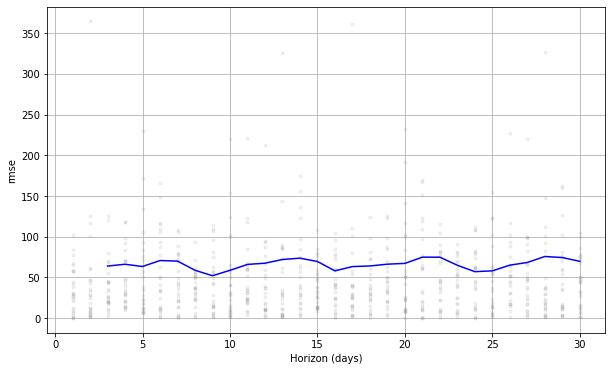

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='rmse')

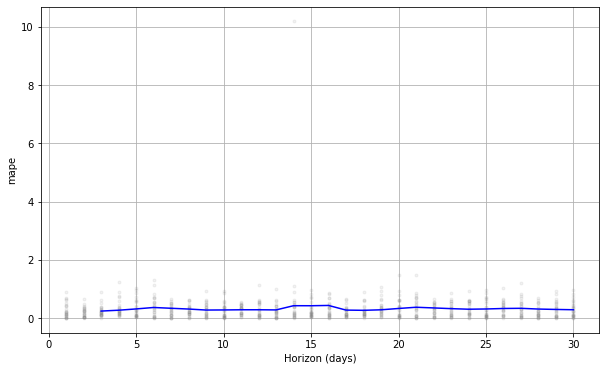

In [ ]:
fig=plot_cross_validation_metric(df_cv_final,metric='mape')

In [ ]:
df_performance.mean()

horizon     16 days 12:00:00
mse              4419.774877
rmse               66.207444
mae                47.767347
mape                0.315114
mdape               0.246549
smape               0.294875
coverage            0.946792
dtype: object

In [ ]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model_tuned, forecast)
fig.update_layout( 
                  yaxis_title="Spine Q.tà",
                  xaxis_title="Data",
                  title="Spine CrossValidation",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-05,259.205050,158.832506,425.087535,259.205050,259.205050,34.885337,34.885337,34.885337,34.885337,34.885337,34.885337,0.0,0.0,0.0,294.090387
1,2021-05-21,255.880817,177.966995,453.164338,255.880817,255.880817,57.325722,57.325722,57.325722,57.325722,57.325722,57.325722,0.0,0.0,0.0,313.206538
2,2021-05-25,255.049758,78.457383,352.697844,255.049758,255.049758,-34.295291,-34.295291,-34.295291,-34.295291,-34.295291,-34.295291,0.0,0.0,0.0,220.754467
3,2021-05-26,254.841994,153.884938,428.280101,254.841994,254.841994,34.885337,34.885337,34.885337,34.885337,34.885337,34.885337,0.0,0.0,0.0,289.727331
4,2021-05-27,254.634229,110.958036,389.593299,254.634229,254.634229,-7.245225,-7.245225,-7.245225,-7.245225,-7.245225,-7.245225,0.0,0.0,0.0,247.389004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,2022-12-18,202.999238,27.462480,306.582670,201.013166,204.682211,-33.653408,-33.653408,-33.653408,-33.653408,-33.653408,-33.653408,0.0,0.0,0.0,169.345830
547,2022-12-19,203.149313,1.555097,278.027342,201.063723,204.933512,-65.508294,-65.508294,-65.508294,-65.508294,-65.508294,-65.508294,0.0,0.0,0.0,137.641019
548,2022-12-20,203.299388,29.875902,304.900247,201.035334,205.181508,-34.295291,-34.295291,-34.295291,-34.295291,-34.295291,-34.295291,0.0,0.0,0.0,169.004096
549,2022-12-21,203.449463,96.451938,376.175385,200.981034,205.470038,34.885337,34.885337,34.885337,34.885337,34.885337,34.885337,0.0,0.0,0.0,238.334800


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
516,2022-11-05,109.971996,372.327220,245.037170,534.01
517,2022-11-19,113.868156,383.716236,247.138221,259.65
518,2022-11-20,21.374923,302.879688,165.143729,127.04
519,2022-11-21,-2.488873,266.081444,133.438918,99.00
520,2022-11-22,21.504735,305.034709,164.801996,82.00


In [ ]:
# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values

mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

mse_01 = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse_01)

mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: %.3f' % mape_01)

MAE: 47.973
MSE: 4853.896
MAPE: 0.776


In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure()
# index = df_merge.index

# #Actual 
# fig.add_trace(go.Scatter(x = index, 
#                          y = y_true,
#                          mode = "lines",
#                          name = "Actual",
#                          line_color='#0000FF',
#                          ))

# #Predicted 
# fig.add_trace(go.Scatter(x = index, 
#                          y = y_pred,
#                          mode = "lines", 
#                          name = "Predicted",
#                          line_color='#ff8c00',
#                          ))

# # adjust layout
# fig.update_layout(title = "Titolo",
#                   xaxis_title = "Date",
#                   yaxis_title = "Sales",
#                   width = 950,
#                   height = 700,
#                   )

# # zoomming
# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=15, label="15m", step="month", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )

## Save Model

In [ ]:
import joblib

modelpath = "model_prophet.pkl"
joblib.dump(model_tuned,modelpath)  # Save model

new_model = joblib.load(modelpath)  # Load model
future = new_model.make_future_dataframe(40, freq='D')
#prediction
forecast = new_model.predict(future)
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2021-05-05,52.688084,306.422761,187.508017
1,2021-05-21,115.444161,373.171121,244.948112
2,2021-05-25,34.295563,290.516877,161.589826
3,2021-05-26,107.341524,355.849689,233.682398
4,2021-05-27,66.983752,315.291943,192.421481
...,...,...,...,...
556,2022-12-28,70.972043,322.243022,201.142737
557,2022-12-29,24.397800,283.305166,157.470396
558,2022-12-30,81.198166,353.543635,222.977063
559,2022-12-31,86.635040,336.995023,212.895617
